## Import librarys

In [1]:
import path_manager as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Covid-19 
***

In [2]:
# Loads the Covid-19 dataset
df_covid  = pd.read_csv(pm.covid_data_path)

In [3]:
df_covid

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,05/23/2024,217,167,27,1,228,380,25,0,43,...,7,13,1,0,10,10,20,2,0,61030
1546,05/24/2024,235,164,27,0,231,387,25,0,57,...,8,7,3,0,10,10,20,2,0,61030
1547,05/25/2024,145,114,26,0,228,385,25,0,27,...,8,11,1,0,10,11,21,2,0,61030
1548,05/26/2024,160,134,7,0,232,390,23,0,35,...,7,2,1,0,9,10,20,2,0,61030


## Data Covid-19 modeling 
***

In [4]:
# Check for any missing values in the DataFrame
missing_data = df_covid.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 date_of_interest                   0
CASE_COUNT                         0
PROBABLE_CASE_COUNT                0
HOSPITALIZED_COUNT                 0
DEATH_COUNT                        0
CASE_COUNT_7DAY_AVG                0
ALL_CASE_COUNT_7DAY_AVG            0
HOSP_COUNT_7DAY_AVG                0
DEATH_COUNT_7DAY_AVG               0
BX_CASE_COUNT                      0
BX_PROBABLE_CASE_COUNT             0
BX_HOSPITALIZED_COUNT              0
BX_DEATH_COUNT                     0
BX_CASE_COUNT_7DAY_AVG             0
BX_PROBABLE_CASE_COUNT_7DAY_AVG    0
BX_ALL_CASE_COUNT_7DAY_AVG         0
BX_HOSPITALIZED_COUNT_7DAY_AVG     0
BX_DEATH_COUNT_7DAY_AVG            0
BK_CASE_COUNT                      0
BK_PROBABLE_CASE_COUNT             0
BK_HOSPITALIZED_COUNT              0
BK_DEATH_COUNT                     0
BK_CASE_COUNT_7DAY_AVG             0
BK_PROBABLE_CASE_COUNT_7DAY_AVG    0
BK_ALL_CASE_COUNT_7DAY_AVG         0
BK_HOSPITALIZED_COUNT_7DAY_AVG     0
BK_DEA

In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date_of_interest                 1550 non-null   object
 1   CASE_COUNT                       1550 non-null   int64 
 2   PROBABLE_CASE_COUNT              1550 non-null   int64 
 3   HOSPITALIZED_COUNT               1550 non-null   int64 
 4   DEATH_COUNT                      1550 non-null   int64 
 5   CASE_COUNT_7DAY_AVG              1550 non-null   int64 
 6   ALL_CASE_COUNT_7DAY_AVG          1550 non-null   int64 
 7   HOSP_COUNT_7DAY_AVG              1550 non-null   int64 
 8   DEATH_COUNT_7DAY_AVG             1550 non-null   int64 
 9   BX_CASE_COUNT                    1550 non-null   int64 
 10  BX_PROBABLE_CASE_COUNT           1550 non-null   int64 
 11  BX_HOSPITALIZED_COUNT            1550 non-null   int64 
 12  BX_DEATH_COUNT                   1

In [6]:
# Convert date to datetime format
df_covid['date_of_interest'] = pd.to_datetime(df_covid['date_of_interest'])

In [7]:
print(df_covid['date_of_interest'].dtypes)

datetime64[ns]


In [8]:
# Selection of indicators for analysis
columns_covid = {
    'date_of_interest': 'Data',
    'CASE_COUNT': 'Number of cases',
    'PROBABLE_CASE_COUNT': 'Probable cases',
    'HOSPITALIZED_COUNT': 'Hospitalized',
    'DEATH_COUNT': 'Number of deaths',
}

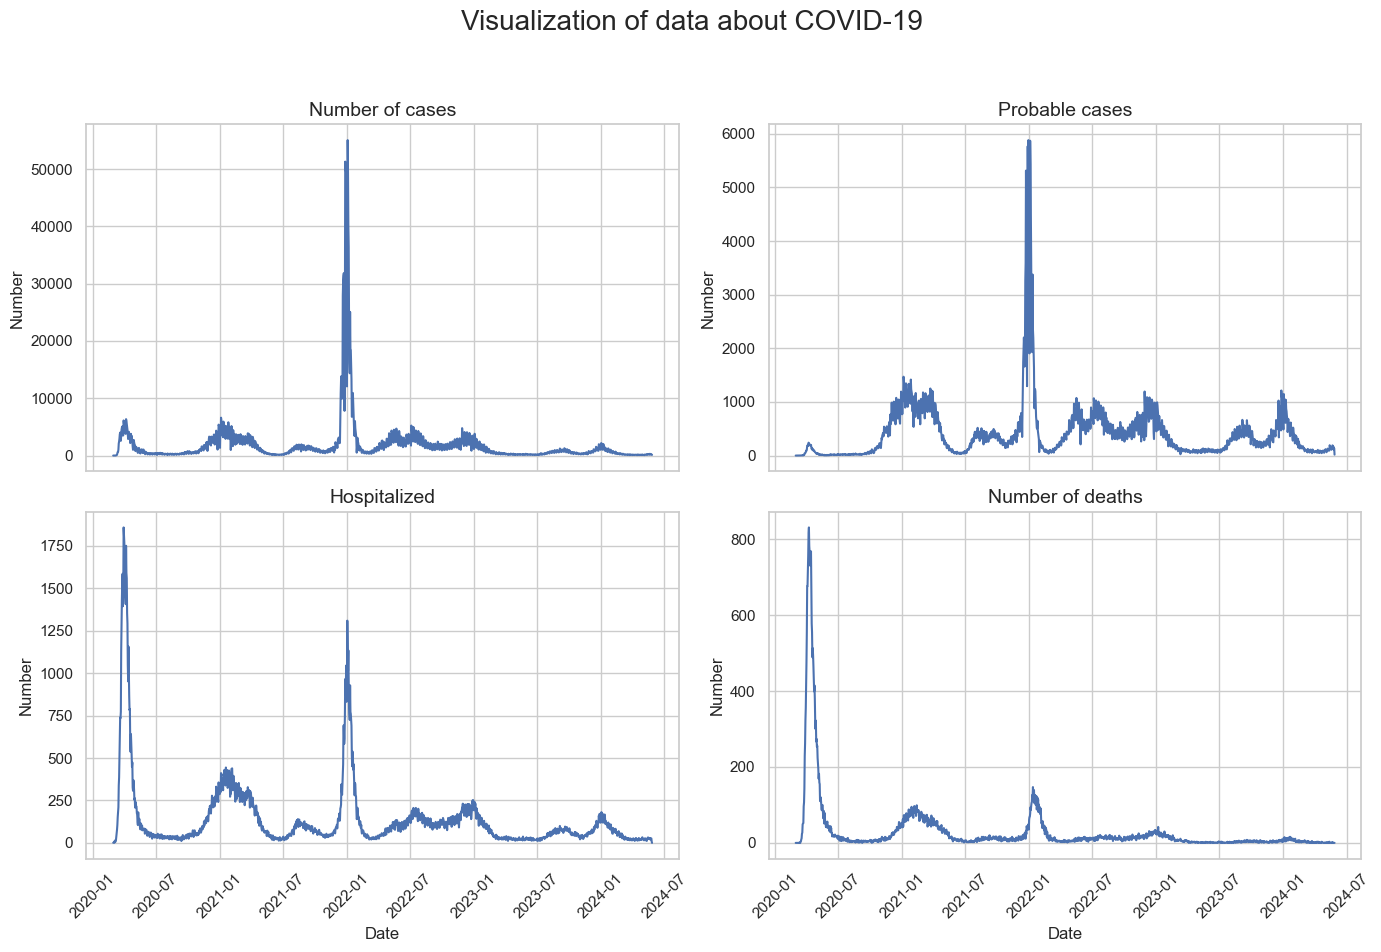

In [9]:
# Set style
sns.set_theme(style='whitegrid')

# Visualize data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)
fig.suptitle('Visualization of data about COVID-19', fontsize=20)

for i, (original_column, new_column) in enumerate(columns_covid.items()):
    if original_column == 'date_of_interest':
        continue
    ax = axes[(i-1)//2, (i-1)%2]  # Skip first row as date
    sns.lineplot(x=df_covid['date_of_interest'], y=df_covid[original_column], ax=ax)
    ax.set_title(new_column, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Number', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjustment of the lower axis
for ax in axes[-1, :]:
    ax.set_xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Data Taxi modeling
***

In [12]:
# Loads the Taxi dataset example
df_taxi_yellow  = pd.read_csv(pm.taxi_yellow_data_example)
df_taxi_green  = pd.read_csv(pm.taxi_green_data_example)
df_taxi_fhv  = pd.read_csv(pm.taxi_fhv_example)

In [13]:
df_taxi_yellow 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2015-01-01 00:11:33,2015-01-01 00:16:48,1,1.0,1,N,41,166,1,5.7,0.5,0.5,1.40,0.0,0.0,8.40,NaN,NaN
1,1,2015-01-01 00:18:24,2015-01-01 00:24:20,1,0.9,1,N,166,238,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,NaN,NaN
2,1,2015-01-01 00:26:19,2015-01-01 00:41:06,1,3.5,1,N,238,162,1,13.2,0.5,0.5,2.90,0.0,0.0,17.40,NaN,NaN
3,1,2015-01-01 00:45:26,2015-01-01 00:53:20,1,2.1,1,N,162,263,1,8.2,0.5,0.5,2.37,0.0,0.0,11.87,NaN,NaN
4,1,2015-01-01 00:59:21,2015-01-01 01:05:24,1,1.0,1,N,236,141,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12503925,1,2015-01-31 23:21:42,2015-01-31 23:31:00,1,1.6,1,N,90,249,1,8.0,0.5,0.5,2.32,0.0,0.3,11.62,NaN,NaN
12503926,1,2015-01-31 23:42:43,2015-01-31 23:49:32,1,0.6,1,N,90,68,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,NaN,NaN
12503927,1,2015-01-31 23:55:16,2015-02-01 00:16:45,1,3.0,1,N,68,148,1,15.0,0.5,0.5,4.07,0.0,0.3,20.37,NaN,NaN
12503928,1,2015-01-31 23:20:53,2015-02-01 00:07:35,1,6.9,1,N,189,237,1,32.5,0.5,0.5,6.00,0.0,0.3,39.80,NaN,NaN


In [14]:
df_taxi_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12503930 entries, 0 to 12503929
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.8+ GB


In [15]:
df_taxi_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2015-01-01 00:31:10,2015-01-01 00:50:41,N,1,255,234,1,5.88,20.0,0.5,0.5,4.1,0.0,NaN,0.3,25.4,1,1.0,NaN
1,2,2015-01-01 00:01:05,2015-01-01 00:03:30,N,1,75,74,1,0.89,4.5,0.5,0.5,0.0,0.0,NaN,0.3,5.8,2,1.0,NaN
2,2,2015-01-01 00:09:01,2015-01-01 00:33:26,N,1,43,186,1,5.71,22.0,0.5,0.5,0.0,0.0,NaN,0.3,23.3,1,1.0,NaN
3,2,2015-01-01 00:17:34,2015-01-01 00:27:07,N,1,80,36,1,1.89,8.5,0.5,0.5,0.0,0.0,NaN,0.3,9.8,2,1.0,NaN
4,2,2015-01-01 00:32:38,2015-01-01 00:40:32,N,1,37,17,1,1.07,6.5,0.5,0.5,0.0,0.0,NaN,0.3,7.8,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481452,2,2015-01-31 23:50:32,2015-02-01 00:05:43,N,1,75,230,1,3.91,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0,NaN
1481453,1,2015-01-31 23:20:01,2015-01-31 23:34:29,N,1,80,112,1,2.00,11.0,0.5,0.5,1.0,0.0,NaN,0.3,13.3,1,1.0,NaN
1481454,1,2015-01-31 23:52:30,2015-02-01 00:18:53,N,1,112,79,1,4.70,20.5,0.5,0.5,5.0,0.0,NaN,0.3,26.8,1,1.0,NaN
1481455,2,2015-01-31 23:47:51,2015-01-31 23:59:03,N,1,74,250,1,5.98,18.0,0.5,0.5,0.0,0.0,NaN,0.3,19.3,2,1.0,NaN


In [16]:
df_taxi_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481457 entries, 0 to 1481456
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1481457 non-null  int64  
 1   lpep_pickup_datetime   1481457 non-null  object 
 2   lpep_dropoff_datetime  1481457 non-null  object 
 3   store_and_fwd_flag     1481457 non-null  object 
 4   RatecodeID             1481457 non-null  int64  
 5   PULocationID           1481457 non-null  int64  
 6   DOLocationID           1481457 non-null  int64  
 7   passenger_count        1481457 non-null  int64  
 8   trip_distance          1481457 non-null  float64
 9   fare_amount            1481457 non-null  float64
 10  extra                  1481457 non-null  float64
 11  mta_tax                1481457 non-null  float64
 12  tip_amount             1481457 non-null  float64
 13  tolls_amount           1481457 non-null  float64
 14  ehail_fee         

In [17]:
df_taxi_fhv

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2023-12-01 00:15:00,2023-12-01 00:57:00,NaN,NaN,NaN,B00009
1,B00009,2023-12-01 00:20:00,2023-12-01 00:59:00,NaN,NaN,NaN,B00009
2,B00013,2023-12-01 00:27:25,2023-12-01 00:46:00,NaN,NaN,NaN,B00053
3,B00013,2023-12-01 00:00:00,2023-12-01 00:32:00,NaN,NaN,NaN,B00381
4,B00013,2023-12-01 00:45:53,2023-12-01 01:33:00,NaN,NaN,NaN,B00013
...,...,...,...,...,...,...,...
1376743,B03505,2023-12-31 23:28:48,2023-12-31 23:31:58,NaN,198.0,NaN,B03505
1376744,B03505,2023-12-31 23:02:27,2023-12-31 23:21:31,NaN,82.0,NaN,B03505
1376745,B03505,2023-12-31 23:36:24,2024-01-01 00:00:25,NaN,251.0,NaN,B03505
1376746,B03529,2023-12-31 23:15:42,2023-12-31 23:26:29,NaN,61.0,NaN,B03404


In [18]:
df_taxi_fhv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376748 entries, 0 to 1376747
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   dispatching_base_num    1376748 non-null  object 
 1   pickup_datetime         1376748 non-null  object 
 2   dropOff_datetime        1376748 non-null  object 
 3   PUlocationID            239254 non-null   float64
 4   DOlocationID            1166106 non-null  float64
 5   SR_Flag                 0 non-null        float64
 6   Affiliated_base_number  1362044 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.5+ MB


## Data analysis and extraction
***
The set of data taxis is divided into three categories of different types of taxis and has a large volume and consists of 324 files and occupies approximately 122Gb of memory on the device. In order not to use cloud storage and not have additional costs for renting server capacities, the decision was made to calculate data from a local directory on the hard drive, and then store these already calculated data in an Excel table for analysis.

## Preliminary analysis for data outliers
***
The first step is to iterate the sample based on the unique data from the distance indicator, which are present in the data sets for the Yellow and Green taxis. It is obvious that the traveled distance cannot be negative.

In [19]:
# Define pass to folder
data_dir = pm.data_taxi_dir

In [20]:
# Get list all .csv files start with file group name
file_list_green = [f for f in os.listdir(data_dir) if f.startswith('green_tripdata_') and f.endswith('.csv')]
file_list_yellow = [f for f in os.listdir(data_dir) if f.startswith('yellow_tripdata_') and f.endswith('.csv')]
file_list_fhv = [f for f in os.listdir(data_dir) if f.startswith('fhv_tripdata_') and f.endswith('.csv')]

In [21]:
# Count unique indicator in collumn
def get_unique_trip_distances(file_list, column_name):
    """
    Gets unique values from the `trip_distance` column from all files in the specified directory.

    Parameters:
    directory (str): The directory that contains the files.
    prefix (str): Prefix of filenames to process.
    column_name (str): The name of the column from which you want to retrieve unique values.

    Returns:
    list: List of unique value from the 'column_name' column.
    """

    # Initialize an empty set to store unique values trip_distance
    unique_trip_distances = set()

    # Go through each file and select unique values ​​from the column 'trip_distance'
    for file in file_list:
        file_path = os.path.join(pm.data_taxi_dir, file)
        df = pd.read_csv(file_path)
        unique_trip_distances.update(df[column_name].unique())

    # Convert a set of unique values ​​to a list and return it
    return list(unique_trip_distances)

In [22]:
# Call unique trip distances function
column_name = 'trip_distance'
unique_trip_distances_green = get_unique_trip_distances(file_list_green, column_name)
unique_trip_distances_yellow = get_unique_trip_distances(file_list_yellow, column_name)

C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Us

In [23]:
# Show result get_unique_trip_distances
unique_trip_distances_green.sort()
print(unique_trip_distances_green)
unique_trip_distances_yellow.sort()
print(unique_trip_distances_yellow)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

## Determine statistical outliers
***

Based on the results obtained from the function **get_unique_trip_distances**, it can be concluded that the data may contain a large number of **outliers**. For a more detailed analysis, you need to calculate the standard deviation. Standard deviation measures the spread of values relative to the mean.

**Large standard deviation** means that the data is scattered far from the mean.

**Small standard deviation** means that the values are more grouped around the mean.

Calculating the standard deviation will help you assess the variability of the data and determine how much it deviates from the mean. This can be useful for identifying outliers and making further data processing decisions.

In [24]:
# Setting up the working environment 
"""
Specify the path to the directory with data, and also form lists of files for each taxi group:
 - **Yellow taxi** (`yellow_tripdata_YYYY-MM.csv`) 
- **Green taxi** (`green_tripdata_YYYY-MM.csv`) 
- In **Fhv taxi** no data about distanse, can only count numbers of trips.
"""
# Group files depent on name (yellow / green)
file_list_yellow = [
    f for f in os.listdir(data_dir)
    if f.startswith("yellow_tripdata_") and f.endswith(".csv")
]

file_list_green = [
    f for f in os.listdir(data_dir)
    if f.startswith("green_tripdata_") and f.endswith(".csv")
]

file_list_fhv = [
    f for f in os.listdir(data_dir)
    if f.startswith("fhv_tripdata_") and f.endswith(".csv")
]

In [25]:
print(f"Yellow list count number is {len(file_list_yellow)}")
print(f"Green list count number is  {len(file_list_green)}")
print(f"FHV list count number is  {len(file_list_fhv)}")

Yellow list count number is 108
Green list count number is  108
FHV list count number is  108


In [26]:
def detect_outliers(df, column_name):
    """
    Looks for abnormal values (outliers) in column column_name.
    Returns a DataFrame with all found anomalous strings.
    Anomalies are determined by the criterion:
    - Value < 0 (cannot be negative)
    - Value outside [mean - 3*std, mean + 3*std]
    (taking into account the fact that the lower limit cannot be less than 0)
    """
    mean_val = df[column_name].mean()
    std_val = df[column_name].std()

    # For the case if mean - 3*std < 0, set lower_bound = 0
    lower_bound = max(0, mean_val - 3 * std_val)
    upper_bound = mean_val + 3 * std_val

    # Conditions of "abnormality":
    # 1) trip_distance < 0
    # 2) trip_distance < lower_bound або trip_distance > upper_bound
    outliers = df[
        (df[column_name] < 0) |
        (df[column_name] < lower_bound) |
        (df[column_name] > upper_bound)
    ]
    return outliers

In [27]:
def clean_and_collect_outliers(file_list, column_name, group_name, data_directory):
    """
    Clears all files from the file_list list (one taxi group) of anomalous values 
    in column column_name, while saving the discarded rows to a shared CSV file 
    outliers_{group_name}.csv.
    """
    all_group_outliers = pd.DataFrame()

    for file_name in file_list:
        file_path = os.path.join(data_directory, file_name)
        df = pd.read_csv(file_path)

        # Find anomaly
        outliers_df = detect_outliers(df, column_name)

        # If there are anomalies, add them to the general DataFrame
        if not outliers_df.empty:
            outliers_df["source_file"] = file_name  # To know from which file these lines
            all_group_outliers = pd.concat([all_group_outliers, outliers_df], ignore_index=True)

        # Remove anomalies from the main DataFrame
        df_cleaned = df.drop(outliers_df.index)

        # Overwrite the same file, but without abnormal lines
        df_cleaned.to_csv(file_path, index=False)

    # After processing all the files of the group, save the deleted rows
    if not all_group_outliers.empty:
        outlier_file_name = f"outliers_{group_name}.csv"
        outlier_file_path = os.path.join(data_directory, outlier_file_name)
        all_group_outliers.to_csv(outlier_file_path, index=False)
        print(f"[INFO] Stored group anomalies '{group_name}' in file: {outlier_file_name}")
    else:
        print(f"[INFO] No anomalies found in the group '{group_name}'.")

#### Starting the cleaning process for each group 
Call the 'clean_and_collect_outliers' function for three taxi groups: - **Yellow** - **Green** 

In each case: 
1. Pass the appropriate list of files. 
2. The name of the column by which we detect anomalies (for example, '"trip_distance"'). 
3. The name of the group (to form the original CSV with anomalies). 
4. Directory with data.

Note: In **FHV taxi** no data about distanse, can only count numbers of trips.

In [ ]:
# Name of the column that check for anomalies
column_name = "trip_distance"
pd.options.mode.chained_assignment = None

# Call for "Yellow taxi"
clean_and_collect_outliers(
    file_list=file_list_yellow,
    column_name=column_name,
    group_name="yellow",
    data_directory=data_dir
)

# Call for "Green taxi"
clean_and_collect_outliers(
    file_list=file_list_green,
    column_name=column_name,
    group_name="green",
    data_directory=data_dir
)

# In "FHV taxi" no data about distanse, can only count numbers of trips.

**Logic Explanation**: 
1. For each file in the corresponding list, read CSV ('pd.read_csv'). 
2. Call 'detect_outliers', where: 
- Statistical metrics (mean, standard deviation) are calculated. 
- The limits \\(\\mu \\pm 3\\sigma\\) are set, and it is also taken into account that the distance cannot be less than 0. 
- A set of rows that go beyond these limits or contain negative values is defined. 
3. These lines are added to the *shared* DataFrame 'all_group_outliers'. 
4. Indexes belonging to anomalous strings are removed from the initial DataFrame 'df'. 
5. **Overwrite** the original CSV file ('df_cleaned.to_csv(file_path, index=False)') without any anomalous strings. 
6. When all the files of the group are processed, save the collected anomalies to a file of the format 'outliers_{group_name}.csv'.

**Result**: 
> - The original files in the data storage folder will be overwritten without strings having anomalous or negative 'trip_distance' values. 
> - For each of the three groups (yellow, green), a separate file 'outliers_{group_name}.csv' will be created in the same folder, which will contain all the deleted anomalies.

In this way, the **data cleanup was completed.**

In [29]:
def gather_stats_for_group(file_list, group_name, data_directory):
    """
    Collects statistics from each file in the file_list:
      - year, month (based on the file name),
      - total_trips (number of rows),
      - avg_trip_distance (for group_name in {yellow, green}, otherwise None),
      - count of payments by each type (payment_type),
      - sum of fare_amount, extra, tip_amount.
    Returns a DataFrame with statistics for all files in the group.
    """

    stats_list = []

    for file_name in file_list:
        file_path = os.path.join(data_directory, file_name)

        # Extract year and month from the file name
        # Assuming format: {group_name}_tripdata_YYYY-MM.csv
        # Example: "yellow_tripdata_2022-02.csv" -> year="2022", month="02"
        base_name = os.path.splitext(file_name)[0]  # "yellow_tripdata_2022-02"
        parts = base_name.split("_")  # ["yellow", "tripdata", "2022-02"]
        if len(parts) == 3:
            year_month = parts[-1]     # "2022-02"
            year_str, month_str = year_month.split("-")
        else:
            # If the format is different, set a placeholder
            year_str, month_str = ("0000", "00")

        # Read the CSV
        df = pd.read_csv(file_path)

        # Count the number of rows = total trips
        total_trips = len(df)

        # Calculate average trip distance for green and yellow
        # For fhv (if trip_distance is missing), set None or 0
        if group_name in ["yellow", "green"] and "trip_distance" in df.columns:
            avg_trip_distance = df["trip_distance"].mean()
        else:
            avg_trip_distance = None

        # Count the number of payments by type (payment_type)
        # Create a dictionary: {1: count_1, 2: count_2, ...}
        pay_counts = df["payment_type"].value_counts(dropna=False) if "payment_type" in df.columns else {}

        # Sum fare_amount, extra, tip_amount
        # If these columns are missing in df.columns, set them to 0
        total_fare_amount = df["fare_amount"].sum() if "fare_amount" in df.columns else 0
        total_extra = df["extra"].sum() if "extra" in df.columns else 0
        total_tip_amount = df["tip_amount"].sum() if "tip_amount" in df.columns else 0

        # Create a statistics row (dict) for the current file
        row_stats = {
            "year": year_str,
            "month": month_str,
            "total_trips": total_trips,
            "avg_trip_distance": avg_trip_distance,
            "fare_amount_sum": total_fare_amount,
            "extra_sum": total_extra,
            "tip_amount_sum": total_tip_amount
        }

        # Add information about payment types (e.g., payment_type_1_count, payment_type_2_count, etc.)
        # depending on what payment types are present in the file
        if isinstance(pay_counts, pd.Series):
            for pt_val, pt_count in pay_counts.items():
                col_name = f"payment_type_{pt_val}_count"
                row_stats[col_name] = pt_count

        stats_list.append(row_stats)

    # Create a consolidated DataFrame from all files in the group
    df_stats = pd.DataFrame(stats_list)
    return df_stats

In [30]:
def create_stats_csv_for_each_group():
    """
    Creates a separate CSV file with consolidated statistics by month/year for each group.
    """
    # Yellow taxis
    if file_list_yellow:
        yellow_stats = gather_stats_for_group(file_list_yellow, "yellow", data_dir)
        # Save to a file (e.g., "stats_yellow.csv")
        yellow_stats.to_csv(os.path.join(data_dir, "stats_yellow.csv"), index=False)
        print("[INFO] Statistics for yellow taxis saved to 'stats_yellow.csv'")

    # Green taxis
    if file_list_green:
        green_stats = gather_stats_for_group(file_list_green, "green", data_dir)
        green_stats.to_csv(os.path.join(data_dir, "stats_green.csv"), index=False)
        print("[INFO] Statistics for green taxis saved to 'stats_green.csv'")

    # FHV taxis
    if file_list_fhv:
        fhv_stats = gather_stats_for_group(file_list_fhv, "fhv", data_dir)
        fhv_stats.to_csv(os.path.join(data_dir, "stats_fhv.csv"), index=False)
        print("[INFO] Statistics for FHV taxis saved to 'stats_fhv.csv'")


In [ ]:
# Call the main function to create 3 consolidated files
create_stats_csv_for_each_group()

### Explanation Execution

The last executed code processed taxi trip data from three groups (**yellow**, **green**, **fhv**) and generated summary statistics for each group, grouped by **month** and **year**. These statistics were saved into separate CSV files for further analysis and visualization.

---

#### Key Steps Executed:

#### 1. **Read Data Files**
- The program identified all relevant files for each taxi group from the specified directory:
  - Files starting with `yellow_tripdata_` were grouped under Yellow Taxi.
  - Files starting with `green_tripdata_` were grouped under Green Taxi.
  - Files starting with `fhv_tripdata_` were grouped under FHV Taxi.

#### 2. **Extract Year and Month**
- For each file, the program extracted the year and month from the filename (e.g., `yellow_tripdata_2022-02.csv` -> year = `2022`, month = `02`).

#### 3. **Compute Statistics**
For each file, the following metrics were calculated:
- **Total trips**: The total number of rows in the file (each row represents one trip).
- **Average trip distance** (`avg_trip_distance`):
  - Calculated for Yellow and Green Taxis using the `trip_distance` column.
  - Ignored for FHV Taxis (set as `None` since FHV data does not typically include `trip_distance`).
- **Counts of payment types** (`payment_type_X_count`):  
  - Counts the number of trips associated with each `payment_type` (e.g., cash, card, or other methods).
- **Total fare amount** (`fare_amount_sum`):  
  - The sum of the `fare_amount` column for all trips in the file.
- **Extra charges** (`extra_sum`):  
  - The sum of the `extra` column for all trips in the file.
- **Total tips** (`tip_amount_sum`):  
  - The sum of the `tip_amount` column for all trips in the file.

#### 4. **Aggregate Results**
- For each taxi group, the program created a DataFrame summarizing the statistics for each month and year.
- Columns in the DataFrame include:
  - `year`, `month`, `total_trips`, `avg_trip_distance`, `fare_amount_sum`, `extra_sum`, `tip_amount_sum`, and counts for each `payment_type`.

#### 5. **Save Results**
- The program saved the aggregated statistics for each group into separate CSV files:
  - `stats_yellow.csv`
  - `stats_green.csv`
  - `stats_fhv.csv`
- These files were stored in the same directory as the input data.

---

#### Output Files:
1. **`stats_yellow.csv`**
   - Contains summarized data for all Yellow Taxi files grouped by month and year.
   - Includes metrics like total trips, average trip distance, fare amount, extra charges, tips, and payment type counts.

2. **`stats_green.csv`**
   - Similar structure to `stats_yellow.csv`, but for Green Taxi data.

3. **`stats_fhv.csv`**
   - Contains summarized data for FHV Taxis, but without the `avg_trip_distance` metric since it does not apply to FHV.

## Visualization

C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\39284532.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  covid_monthly = covid_data.resample('M', on='date_of_interest')['CASE_COUNT'].sum()


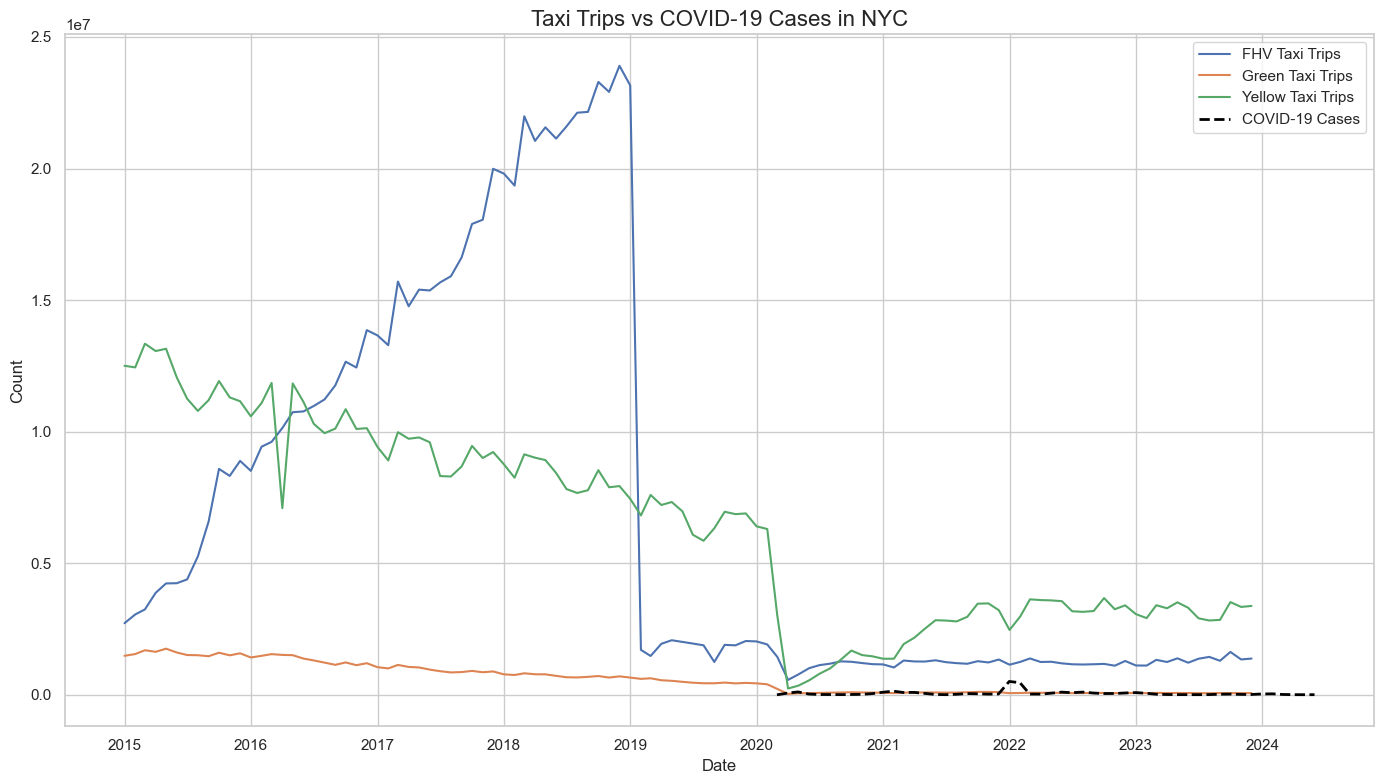

In [37]:
# Load the taxi stats data for each group
stats_yellow = pd.read_csv("E:\Data\TaxiNYC\stats_yellow.csv")
stats_green = pd.read_csv("E:\Data\TaxiNYC\stats_green.csv")
stats_fhv = pd.read_csv("E:\Data\TaxiNYC\stats_fhv.csv")

# Load the COVID-19 data
covid_data = pd.read_csv(pm.covid_data_path)

# Process taxi data
stats_yellow['group'] = 'Yellow'
stats_green['group'] = 'Green'
stats_fhv['group'] = 'FHV'

# Combine all taxi stats into one DataFrame for analysis
taxi_data = pd.concat([stats_yellow, stats_green, stats_fhv], ignore_index=True)

# Convert year and month columns to datetime for easier merging
taxi_data['date'] = pd.to_datetime(taxi_data['year'].astype(str) + '-' + taxi_data['month'].astype(str) + '-01')

# Aggregate taxi data by date and group
taxi_summary = taxi_data.groupby(['date', 'group'])['total_trips'].sum().unstack()

# Process COVID-19 data
covid_data['date_of_interest'] = pd.to_datetime(covid_data['date_of_interest'])
covid_monthly = covid_data.resample('M', on='date_of_interest')['CASE_COUNT'].sum()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot taxi trips
for group in taxi_summary.columns:
    plt.plot(taxi_summary.index, taxi_summary[group], label=f'{group} Taxi Trips')

# Plot COVID-19 cases
plt.plot(covid_monthly.index, covid_monthly, label='COVID-19 Cases', color='black', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.title('Taxi Trips vs COVID-19 Cases in NYC', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Conclusions:
As can be concluded from the visualization, we cannot make a preliminary analysis if we take the entire period as a basis. The reflection of the comparison with covid-19 cases is not significant, so it is proposed to reduce the time frame to a period limited directly to the pandemic period.


C:\Users\Serhii\AppData\Local\Temp\ipykernel_14168\1204884141.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  covid_monthly = covid_data.resample('M', on='date_of_interest')['CASE_COUNT'].sum()


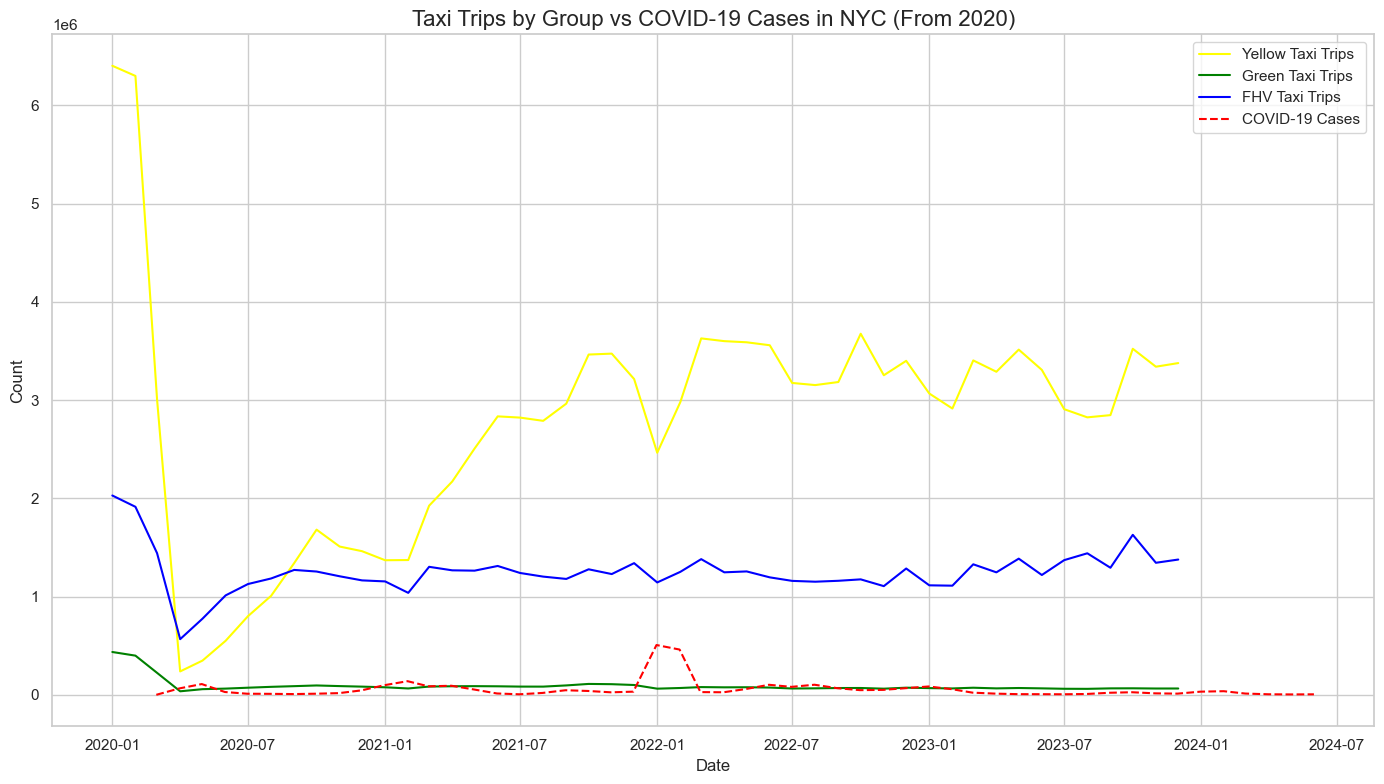

In [38]:
# Load the taxi stats data for each group
stats_yellow = pd.read_csv("E:\Data\TaxiNYC\stats_yellow.csv")
stats_green = pd.read_csv("E:\Data\TaxiNYC\stats_green.csv")
stats_fhv = pd.read_csv("E:\Data\TaxiNYC\stats_fhv.csv")

# Load the COVID-19 data
covid_data = pd.read_csv(pm.covid_data_path)

# Combine taxi data
stats_yellow['group'] = 'Yellow'
stats_green['group'] = 'Green'
stats_fhv['group'] = 'FHV'

# Add a 'date' column for easier merging
stats_yellow['date'] = pd.to_datetime(stats_yellow['year'].astype(str) + '-' + stats_yellow['month'].astype(str) + '-01')
stats_green['date'] = pd.to_datetime(stats_green['year'].astype(str) + '-' + stats_green['month'].astype(str) + '-01')
stats_fhv['date'] = pd.to_datetime(stats_fhv['year'].astype(str) + '-' + stats_fhv['month'].astype(str) + '-01')

# Separate total trips for each taxi group
yellow_trips = stats_yellow.groupby('date')['total_trips'].sum()
green_trips = stats_green.groupby('date')['total_trips'].sum()
fhv_trips = stats_fhv.groupby('date')['total_trips'].sum()

# Process COVID-19 data
covid_data['date_of_interest'] = pd.to_datetime(covid_data['date_of_interest'])
covid_monthly = covid_data.resample('M', on='date_of_interest')['CASE_COUNT'].sum()

# Align the time range from 2020 onwards
yellow_trips_filtered = yellow_trips[yellow_trips.index >= '2020-01-01']
green_trips_filtered = green_trips[green_trips.index >= '2020-01-01']
fhv_trips_filtered = fhv_trips[fhv_trips.index >= '2020-01-01']
covid_monthly_filtered = covid_monthly[covid_monthly.index >= '2020-01-01']

# Plot the filtered data
plt.figure(figsize=(14, 8))

# Plot taxi trips by group
plt.plot(yellow_trips_filtered.index, yellow_trips_filtered, label='Yellow Taxi Trips', color='yellow')
plt.plot(green_trips_filtered.index, green_trips_filtered, label='Green Taxi Trips', color='green')
plt.plot(fhv_trips_filtered.index, fhv_trips_filtered, label='FHV Taxi Trips', color='blue')

# Plot COVID-19 cases
plt.plot(covid_monthly_filtered.index, covid_monthly_filtered, label='COVID-19 Cases', color='red', linestyle='--')

# Add labels, title, and legend
plt.title('Taxi Trips by Group vs COVID-19 Cases in NYC (From 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Conclusions:
As can be concluded from the visualization, the decline in demand for taxis occurs at the beginning of the epidemic and a significant outbreak of registered cases of hospitalization cases of covid-19 in early 2022.

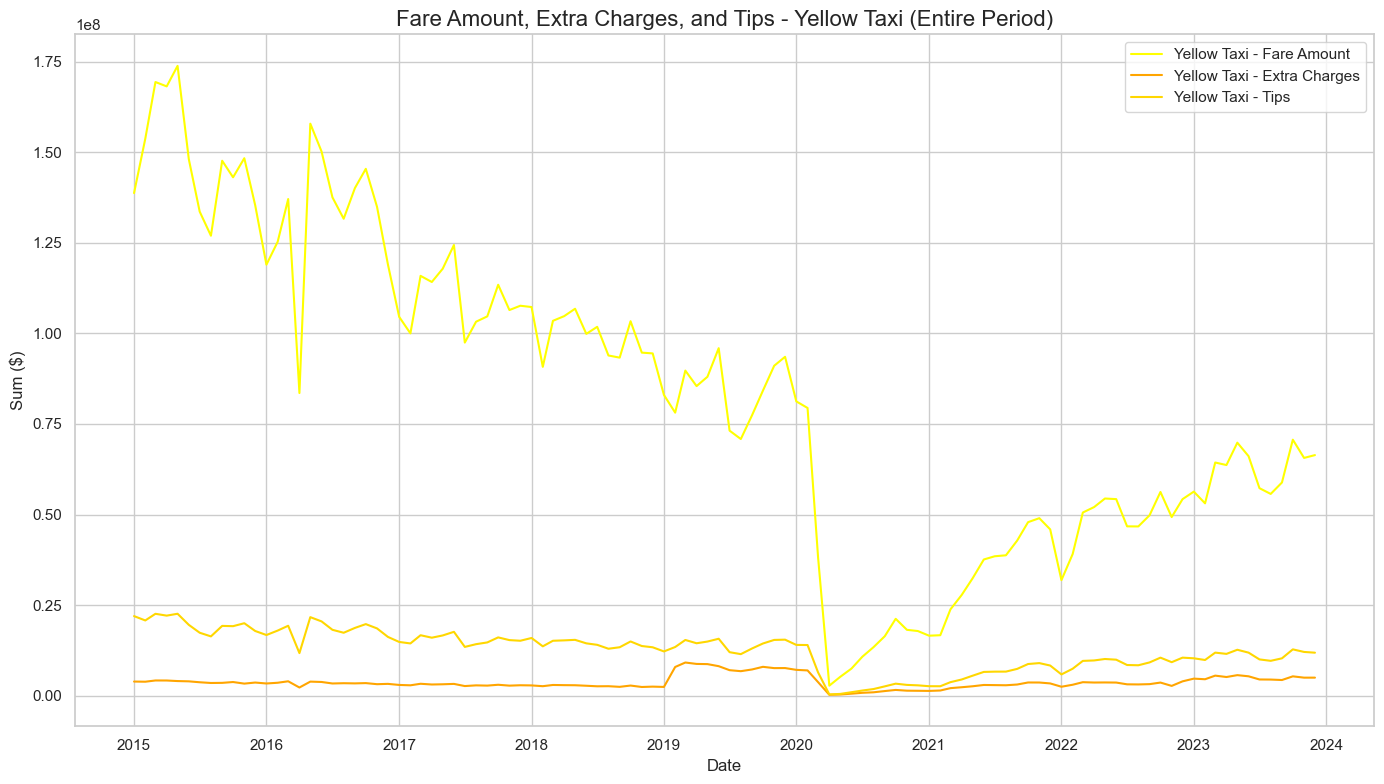

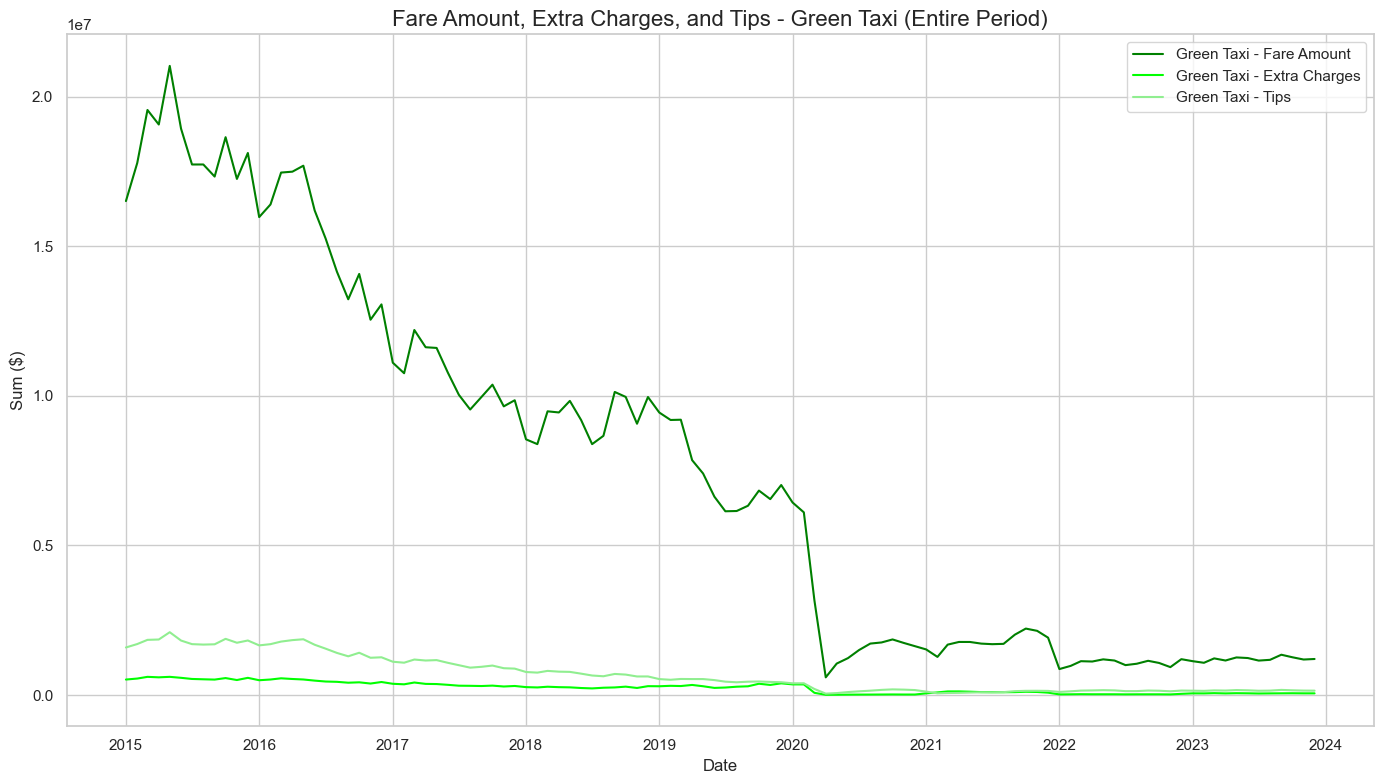

In [39]:
# Add a 'date' column for easier plotting
stats_yellow['date'] = pd.to_datetime(stats_yellow['year'].astype(str) + '-' + stats_yellow['month'].astype(str) + '-01')
stats_green['date'] = pd.to_datetime(stats_green['year'].astype(str) + '-' + stats_green['month'].astype(str) + '-01')

# Plot Yellow Taxi Data
plt.figure(figsize=(14, 8))
plt.plot(stats_yellow['date'], stats_yellow['fare_amount_sum'], label='Yellow Taxi - Fare Amount', color='yellow')
plt.plot(stats_yellow['date'], stats_yellow['extra_sum'], label='Yellow Taxi - Extra Charges', color='orange')
plt.plot(stats_yellow['date'], stats_yellow['tip_amount_sum'], label='Yellow Taxi - Tips', color='gold')

# Add labels, title, and legend
plt.title('Fare Amount, Extra Charges, and Tips - Yellow Taxi', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sum ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Green Taxi Data
plt.figure(figsize=(14, 8))
plt.plot(stats_green['date'], stats_green['fare_amount_sum'], label='Green Taxi - Fare Amount', color='green')
plt.plot(stats_green['date'], stats_green['extra_sum'], label='Green Taxi - Extra Charges', color='lime')
plt.plot(stats_green['date'], stats_green['tip_amount_sum'], label='Green Taxi - Tips', color='lightgreen')

# Add labels, title, and legend
plt.title('Fare Amount, Extra Charges, and Tips - Green Taxi', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sum ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusions:
As can be seen from the graphs, at the beginning of the epidemic, the amount of tips dropped significantly. If for the Yellow Taxi after the fall there is a gradual increase in the volume of tips, then for the Green Taxi it remains without positive trends after the fall.


# End project
***